In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('/content/Superstore.csv', encoding='ISO-8859-1')

In [7]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.shape

(9994, 21)

In [9]:
df.columns = df.columns.str.strip()

In [10]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [13]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


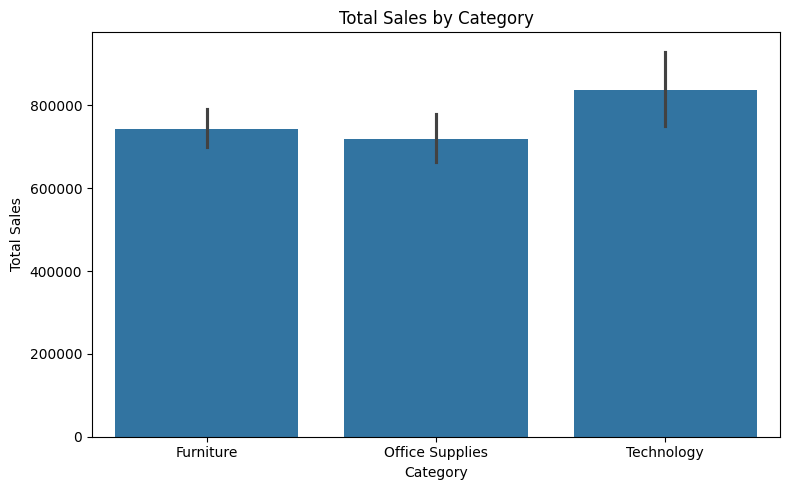

In [14]:
### 1. Sales by Category

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Category', y='Sales', estimator=sum)
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

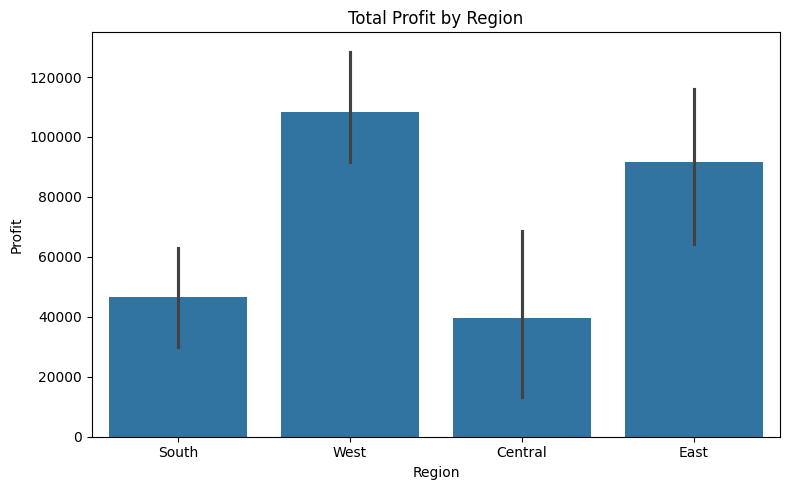

In [15]:
### 2. Profit by Region

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Region', y='Profit', estimator=sum)
plt.title('Total Profit by Region')
plt.ylabel('Profit')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

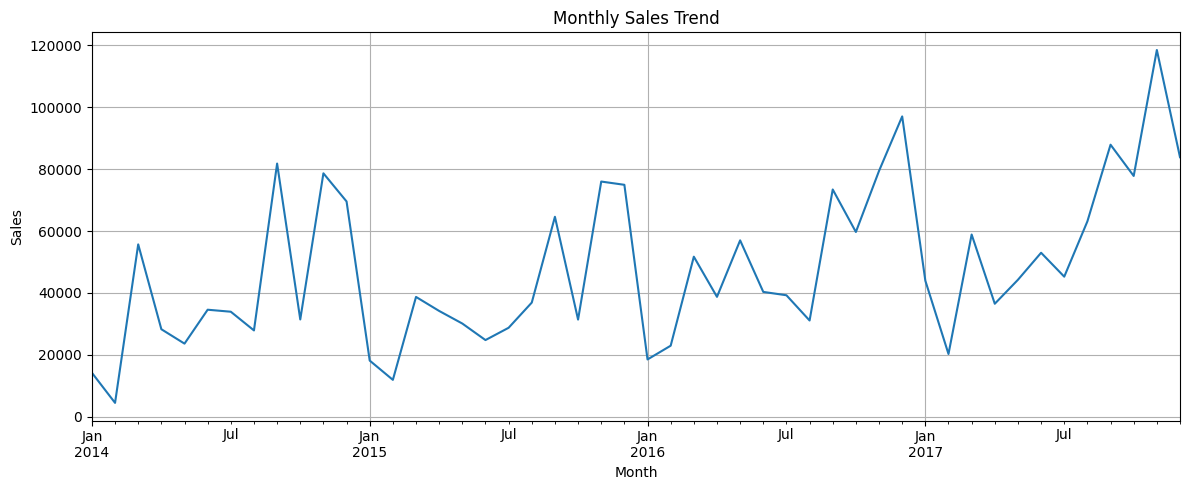

In [16]:
### 3. Monthly Sales Trend

df['Month-Year'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month-Year')['Sales'].sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
### 4. Top 10 Profitable Products

top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

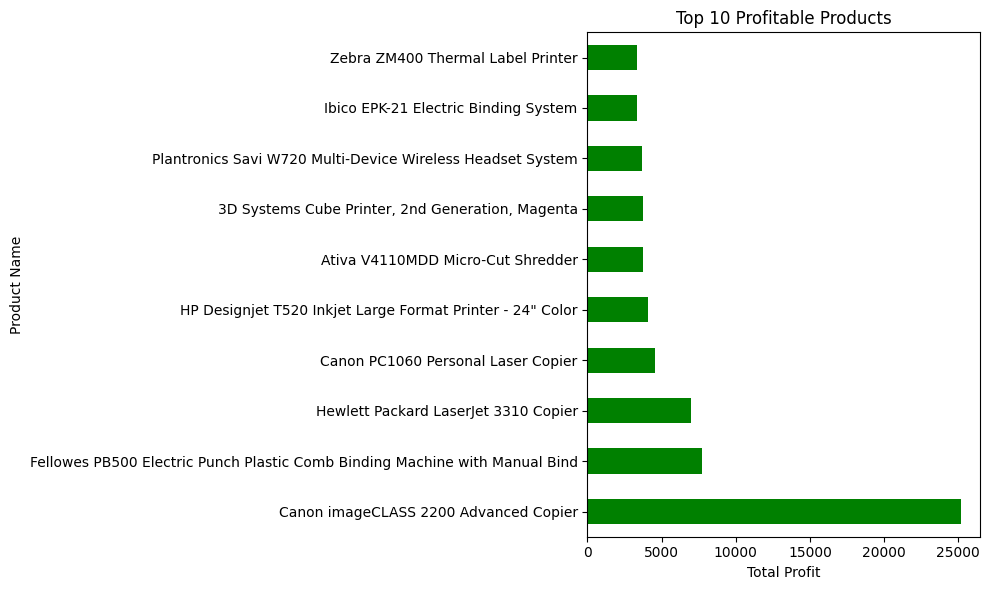

In [18]:
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='green')
plt.title('Top 10 Profitable Products')
plt.xlabel('Total Profit')
plt.tight_layout()
plt.show()